# Visualize connectivity
In this notebook we set a general framework to visaulize the connectivity for a given pattern. We compare the two ways of obtaining w: first there is a method where very small values are replaced for an epislon in the probability vector and for epislon square in the coativation mextri. Second there is the method where this is done using the function log_epislon and substractions of coactivations minus the outer product of probabilities is used. 

First we start using importing all the necessary libraries

In [6]:
from __future__ import print_function
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

from connectivity_functions import get_beta, get_w, get_w_old, softmax
from connectivity_functions import calculate_probability, calculate_coactivations
from data_transformer import build_ortogonal_patterns

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

Now we load the probabilties, the coactivations and w calculated in two different ways

In [7]:
hypercolumns = 3
minicolumns = 5
N = 3  # Number of patterns

patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
patterns = list(patterns_dic.values())[0:4]
patterns = patterns[:N]

# The total probability
p = calculate_probability(patterns)
P = calculate_coactivations(patterns)

w = get_w(P, p)
x = np.outer(p, p)
w_aux = get_w_old(P, p)

#### Connectivity matrix plotting

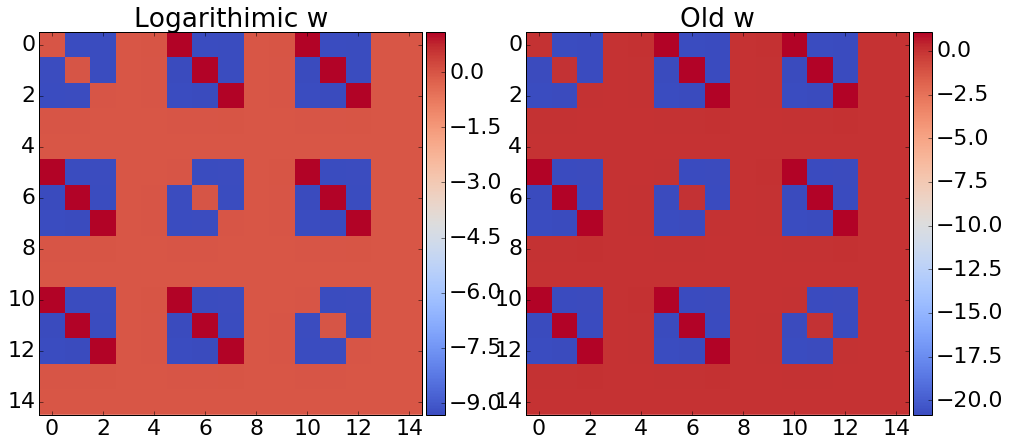

In [8]:
# Plot it
cmap = 'coolwarm'
aux_max = np.max(np.abs(w))

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
# plt.imshow(w, cmap=cmap, interpolation='None', vmin=-aux_max, vmax=aux_max)
im1 = ax1.imshow(w, cmap=cmap, interpolation='None')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, ax=ax1, cax=cax1)
ax1.set_title('Logarithimic w')


ax2 = fig.add_subplot(122)
im2 = ax2.imshow(w_aux, cmap=cmap, interpolation='None')
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, ax=ax2, cax=cax2)
ax2.set_title('Old w')


#### Coactivations and multiplications 

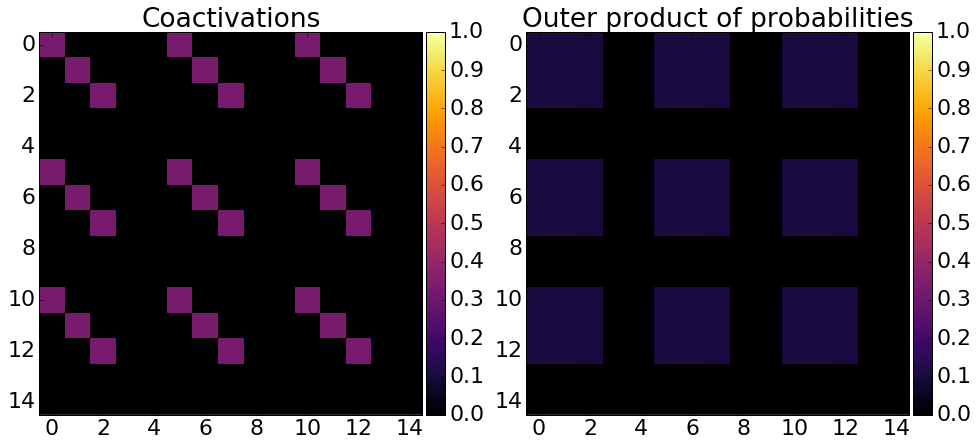

In [9]:
# Plot it
cmap = 'inferno'
aux_max = np.max(np.abs(w))

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
# plt.imshow(w, cmap=cmap, interpolation='None', vmin=-aux_max, vmax=aux_max)
im1 = ax1.imshow(P, cmap=cmap, interpolation='None', vmin=0.0, vmax=1.0)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, ax=ax1, cax=cax1)
ax1.set_title('Coactivations')


ax2 = fig.add_subplot(122)
im2 = ax2.imshow(x, cmap=cmap, interpolation='None', vmin=0.0, vmax=1.0)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, ax=ax2, cax=cax2)
ax2.set_title('Outer product of probabilities')